In [12]:
import numpy as np

In [59]:
import tensorflow as tf

In [77]:
cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [87]:
IMG_SIZE = 224
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

In [89]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [123]:
train_ds, train_ds_info = tfds.load('cifar100', split='train', with_info=True, as_supervised=True)
aa, bb = next(iter(train_ds))
print(aa.shape)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
resized_ds = normalized_ds.map(lambda x, y: (resize_layer(x), y))
resized_ds = resized_ds.batch(32)
image_batch, labels_batch = next(iter(resized_ds))

first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
print(image_batch.shape)

(32, 32, 3)
0.003921569 0.9450975
(32, 224, 224, 3)


In [124]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [125]:
#Mobilnet V1
model = tf.keras.models.Sequential([
  #resize_and_rescale,
  #data_augmentation,
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(224,224,3), strides=(2,2), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(64, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(128, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(128, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(256, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(256, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(512, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(512, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(512, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(512, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(512, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(512, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'), 

  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(1024, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(1024, (1,1)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
    moving_variance_initializer='ones'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.AveragePooling2D((7,7)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='softmax')

])

In [126]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss_fn= tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [127]:
model.compile(optimizer='rmsprop', loss=loss_fn, metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_243 (Bat (None, 112, 112, 32)      128       
_________________________________________________________________
activation_243 (Activation)  (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d_117 (Depthw (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_244 (Bat (None, 112, 112, 32)      128       
_________________________________________________________________
activation_244 (Activation)  (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 112, 112, 64)    

In [129]:
model.fit(resized_ds, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7206s 5s/step - loss: 4.0485 - accuracy: 0.0860
Epoch 2/5
1563/1563 [==============================] - 6091s 4s/step - loss: 2.8083 - accuracy: 0.2862
Epoch 3/5
 265/1563 [====>.........................] - ETA: 1:23:57 - loss: 2.3312 - accuracy: 0.3854

KeyboardInterrupt: 

In [133]:
#Custom data generator
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_train, labels, batch_size=32, dim=(224,224), n_channels=3, n_classes=100, shuffle=True):
        self.x_train = x_train
        self.labels = labels        
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels=n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(len(self.x_train)/self.batch_size))
    
    #Triggered at trainig start and at the end of each epoch
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.x_train))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    #When training, this is called to generate each item 
    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size : (index+1) * self.batch_size]
        x_train_tmp = [self.x_train[k] for k in indexes]
        X, y = self.__data_generation(x_train_tmp)                
        return X, y
    
    def __data_generation(self, x_train_tmp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        
        for i, item in enumerate(x_train_tmp):
            X[i,] = tf.image.resize(x_train[i]/255, [224,224])
            y[i] = self.labels[i]
            
        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)


In [134]:
params = {'dim': (224,224),
          'batch_size': 32,
          'n_classes': 100,
          'n_channels': 3,
          'shuffle': False}

training_generator = DataGenerator(x_train, y_train, **params)
test_generator = DataGenerator(x_test, y_test, **params)

In [139]:
model.fit_generator(generator=training_generator, epochs=5, verbose=1)

Epoch 1/5
   5/1562 [..............................] - ETA: 1:57:39 - loss: 0.0000e+00 - accuracy: 1.0000

KeyboardInterrupt: 

In [135]:
x, y = test_generator[0]

In [116]:
predictions = model.predict(x_test)

In [117]:
np.argmax(predictions, axis = 1)

array([19, 29,  0, 11,  1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39,  8,
       97, 80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64,  8, 17],
      dtype=int64)

In [137]:
x

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.71372551, 0.76078433, 0.65490198],
         [0.71372551, 0.76078433, 0.65490198],
         [0.71372551, 0.76078433, 0.65490198]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.71372551, 0.76078433, 0.65490198],
         [0.71372551, 0.76078433, 0.65490198],
         [0.71372551, 0.76078433, 0.65490198]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.71372551, 0.76078433, 0.65490198],
         [0.71372551, 0.76078433, 0.65490198],
         [0.71372551, 0.76078433, 0.65490198]],

        ...,

        [[0.34117648, 0.47843137, 0.16078432],
         [0.34117648, 0.47843137, 0.16078432]

In [120]:
np.argmax(y_test, axis = 1)

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0, 71, 75, 81, 69, 40, 43, 92,
       97, 70, 53, 70, 49, 75, 29, 21, 16, 39,  8,  8, 70, 20, 61],
      dtype=int64)

In [140]:
predictions

array([[2.5402731e-12, 3.4823189e-10, 1.9209387e-13, ..., 1.4177574e-13,
        7.1447535e-13, 3.2058435e-13],
       [2.6310201e-10, 7.3698295e-15, 3.9442101e-13, ..., 4.1126153e-14,
        9.9950525e-14, 1.2914862e-13],
       [1.0000000e+00, 4.6960891e-15, 1.6108867e-13, ..., 5.4118893e-12,
        8.9784957e-14, 2.1042648e-13],
       ...,
       [3.0089173e-10, 1.0741458e-11, 4.4871593e-13, ..., 2.2815421e-12,
        3.7738275e-13, 2.4893716e-13],
       [4.3468067e-13, 1.1783578e-11, 1.4205935e-14, ..., 9.0960954e-12,
        6.2121566e-14, 4.1391037e-14],
       [1.4527697e-12, 1.7146679e-14, 1.1764330e-15, ..., 1.1407460e-13,
        5.6832840e-16, 3.7787413e-16]], dtype=float32)

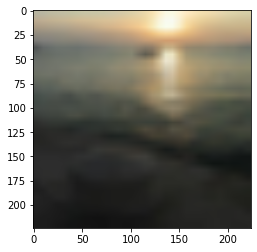

In [152]:
import matplotlib.pyplot as plt
plt.imshow(x[14])

In [153]:
np.argmax(y[14])

40

ImportError: cannot import name 'tfds' from 'tensorflow' (C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\__init__.py)

In [156]:
pip install tensorflow-datasets

  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=2717f47fadfadbc07e2aabf54548416cba34537e652feaecc239c82a682c9eac
  Stored in directory: c:\users\milliman\appdata\local\pip\cache\wheels\8e\70\28\3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=ad39a8c7c7e0404ae6f81b3304556b7563bf1e6f6a36a23bcf62c9ad45cc2ab2
  Stored in directory: c:\users\milliman\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built future promise
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.11.0
    Uninstalling absl-py-0.11.0:
      Successfully uninstalled absl-py-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [164]:
pip install ipywidgets

In [7]:
import tensorflow as tf
import tensorflow_datasets  as tfds

Dl Completed...: |          | 0/0 [00:00<?, ? url/s]

Dl Size...: |          | 0/0 [00:00<?, ? MiB/s]

Extraction completed...: |          | 0/0 [00:00<?, ? file/s]

  0%|          | 0/2 [00:00<?, ? splits/s]

|          | 0/? [00:00<?, ? examples/s]

Shuffling and writing examples to C:\/Users/milliman/tensorflow_datasets/cifar100/3.0.2.incomplete37L4VQ/cifar100-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

|          | 0/? [00:00<?, ? examples/s]

Shuffling and writing examples to C:\/Users/milliman/tensorflow_datasets/cifar100/3.0.2.incomplete37L4VQ/cifar100-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar100 downloaded and prepared to C:\Users\milliman\tensorflow_datasets\cifar100\3.0.2. Subsequent calls will reuse this data.


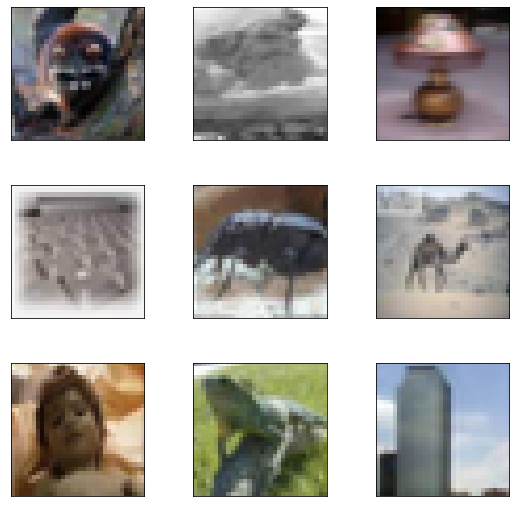

In [2]:
ds, ds_info = tfds.load('cifar100', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)

In [168]:
conda install -c conda-forge ipywidgets

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\milliman\anaconda3\envs\AAI2

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py38haa244fe_0         144 KB  conda-forge
    ipywidgets-7.6.2           |     pyhd3deb0d_0         101 KB  conda-forge
    jupyterlab_widgets-1.0.0   |     pyhd8ed1ab_1         130 KB  conda-forge
    openssl-1.1.1i             |       h8ffe710_0         5.8 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    widgetsnbextension-3.5.1   |   py38haa244fe_4         1.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.1 MB

The followi



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda





openssl-1.1.1i       | 5.8 MB    | #####9     |  60% 
openssl-1.1.1i       | 5.8 MB    | #######1   |  71% 
openssl-1.1.1i       | 5.8 MB    | ########8  |  88% 
openssl-1.1.1i       | 5.8 MB    | ########## | 100% 

python_abi-3.8       | 4 KB      |            |   0% 
python_abi-3.8       | 4 KB      | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... b'Enabling notebook extension jupyter-js-widgets/extension...\n      - Validating: ok\n'
done


In [54]:
ds, ds_info = tfds.load('cifar100', split='train', with_info=True, as_supervised=True)

In [55]:
def normalize_resize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  x = tf.image.resize(image, [224, 224])
  x = tf.cast(x, tf.float32) / 255.
  
  return x, label

In [56]:
ds = ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds = ds.cache()
ds = ds.shuffle(ds_info.splits['train'].num_examples)
ds = ds.batch(32)
ds = ds.prefetch(tf.data.experimental.AUTOTUNE)

In [57]:
tfds.core.benchmark(ds, batch_size=32)

|          | 0/? [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 13328.18 ex/sec (total: 50016 ex, 3.75 sec)
Examples/sec (First only) 9.26 ex/sec (total: 32 ex, 3.46 sec)
Examples/sec (First excluded) 169234.72 ex/sec (total: 49984 ex, 0.30 sec)


{'first+last': {'duration': 3.752650200000062,
  'num_examples': 50016,
  'avg': 13328.18070812973},
 'first': {'duration': 3.457297099999778,
  'num_examples': 32,
  'avg': 9.255785393740693},
 'last': {'duration': 0.29535310000028403,
  'num_examples': 49984,
  'avg': 169234.7227774211},
 'raw': {'start_time': 11922.4493181,
  'first_batch_time': 11925.9066152,
  'end_time': 11926.2019683,
  'num_iter': 1563}}

In [27]:
tfds.core.benchmark(ds, batch_size=32)

InvalidArgumentError: Cannot batch tensors with different shapes in component 0. First element had shape [7,128,32,32,3] and element 1 had shape [128,128,32,32,3].

In [58]:
model.fit(ds, epochs=5)

Epoch 1/5


ValueError: in user code:

    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\keras\layers\pooling.py:295 call
        outputs = self.pool_function(
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\ops\nn_ops.py:4343 avg_pool
        return gen_nn_ops.avg_pool(
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py:82 avg_pool
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\framework\func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\framework\ops.py:3528 _create_op_internal
        ret = Operation(
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\framework\ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\milliman\anaconda3\envs\AAI2\lib\site-packages\tensorflow\python\framework\ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 7 from 1 for '{{node sequential/average_pooling2d/AvgPool}} = AvgPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 7, 7, 1], padding="VALID", strides=[1, 7, 7, 1]](sequential/activation_26/Relu)' with input shapes: [?,1,1,1024].
